In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline


In [2]:
# 1st Dataset
# Read the CSV file and remove all rows with missing values
df = pd.read_csv("jm1.csv", na_values='?')
df.dropna(inplace=True)

In [3]:
X = df.drop('defects', axis=1)  # Features
y = df['defects']  # Target

In [4]:
# Split the data into an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=42),
    'Perceptron': Perceptron(max_iter=100),
    'LinearSVM': LinearSVC(C=1, max_iter=200, dual=False,random_state=42),
    'RBFSVM': SVC(kernel='rbf', gamma='scale', C=1, max_iter=50000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [6]:
# Making scalers
scalers = {
    'None': None,
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler()
}

In [7]:
# Create a custom scorer function for G-Mean
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

In [8]:
# Making scorers
scorers = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'g_mean': gm_scorer
}

In [9]:
# Data structure to store results
cv_results = {
    'Classifier': [],
    'Normalization': [],
    'Accuracy': [],
    'F1 Score': [],
    'G-Mean': [],
    'Fit Time': [],
    'Accuracy Std': [],  # Adding standard deviation keys
    'F1 Score Std': [],
    'G-Mean Std': [],
    'Fit Time Std': []
}

In [10]:
def pipes(scaler, classifier):
    pipe = Pipeline([
        ('scaler', scaler),
        ('clf', classifier)
    ])
    return pipe

In [11]:
# Perform cross-validation for each classifier and normalization technique
for scale, scaler in scalers.items():
    for name, clf in classifiers.items():
        # Cross-validation
        scores = cross_validate(pipes(scaler, clf), X, y, cv=5, scoring=scorers)

        # Append results to data structure
        cv_results['Classifier'].append(name)
        cv_results['Normalization'].append(scale)
        cv_results['Accuracy'].append(scores['test_accuracy'].mean())
        cv_results['F1 Score'].append(scores['test_f1'].mean())
        cv_results['G-Mean'].append(scores['test_g_mean'].mean())
        cv_results['Fit Time'].append(np.mean(scores['fit_time']))  # fit_time is collected separately
        cv_results['Accuracy Std'].append(np.std(scores['test_accuracy']))
        cv_results['F1 Score Std'].append(np.std(scores['test_f1']))
        cv_results['G-Mean Std'].append(np.std(scores['test_g_mean']))
        cv_results['Fit Time Std'].append(np.std(scores['fit_time']))

In [12]:
# Convert results to DataFrame for analysis
df_results = pd.DataFrame(cv_results)
columns_to_print = ['Classifier', 'Normalization', 'Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
print(df_results[columns_to_print])

            Classifier Normalization  Accuracy  F1 Score    G-Mean   Fit Time
0   LogisticRegression          None  0.800735  0.165150  0.309682   0.079570
1           Perceptron          None  0.755239  0.152919  0.242960   0.008576
2            LinearSVM          None  0.808732  0.153638  0.290689   0.172964
3               RBFSVM          None  0.806801  0.025884  0.112686   1.169847
4         DecisionTree          None  0.714706  0.304871  0.511312   0.119975
5         RandomForest          None  0.794945  0.256043  0.413478   1.880380
6        NeuralNetwork          None  0.641085  0.238169  0.375708   0.626665
7   LogisticRegression        MinMax  0.808915  0.121589  0.251734   0.032038
8           Perceptron        MinMax  0.805331  0.197414  0.339876   0.007203
9            LinearSVM        MinMax  0.808915  0.128497  0.258743   0.017544
10              RBFSVM        MinMax  0.805974  0.098820  0.231380   1.409486
11        DecisionTree        MinMax  0.708824  0.292872  0.5004

In [13]:
classifiers = ['LogisticRegression', 'Perceptron', 'LinearSVM', 'RBFSVM', 'DecisionTree', 'RandomForest', 'NeuralNetwork']
metrics = ['Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
normalizations = ['None', 'MinMax', 'Standard']

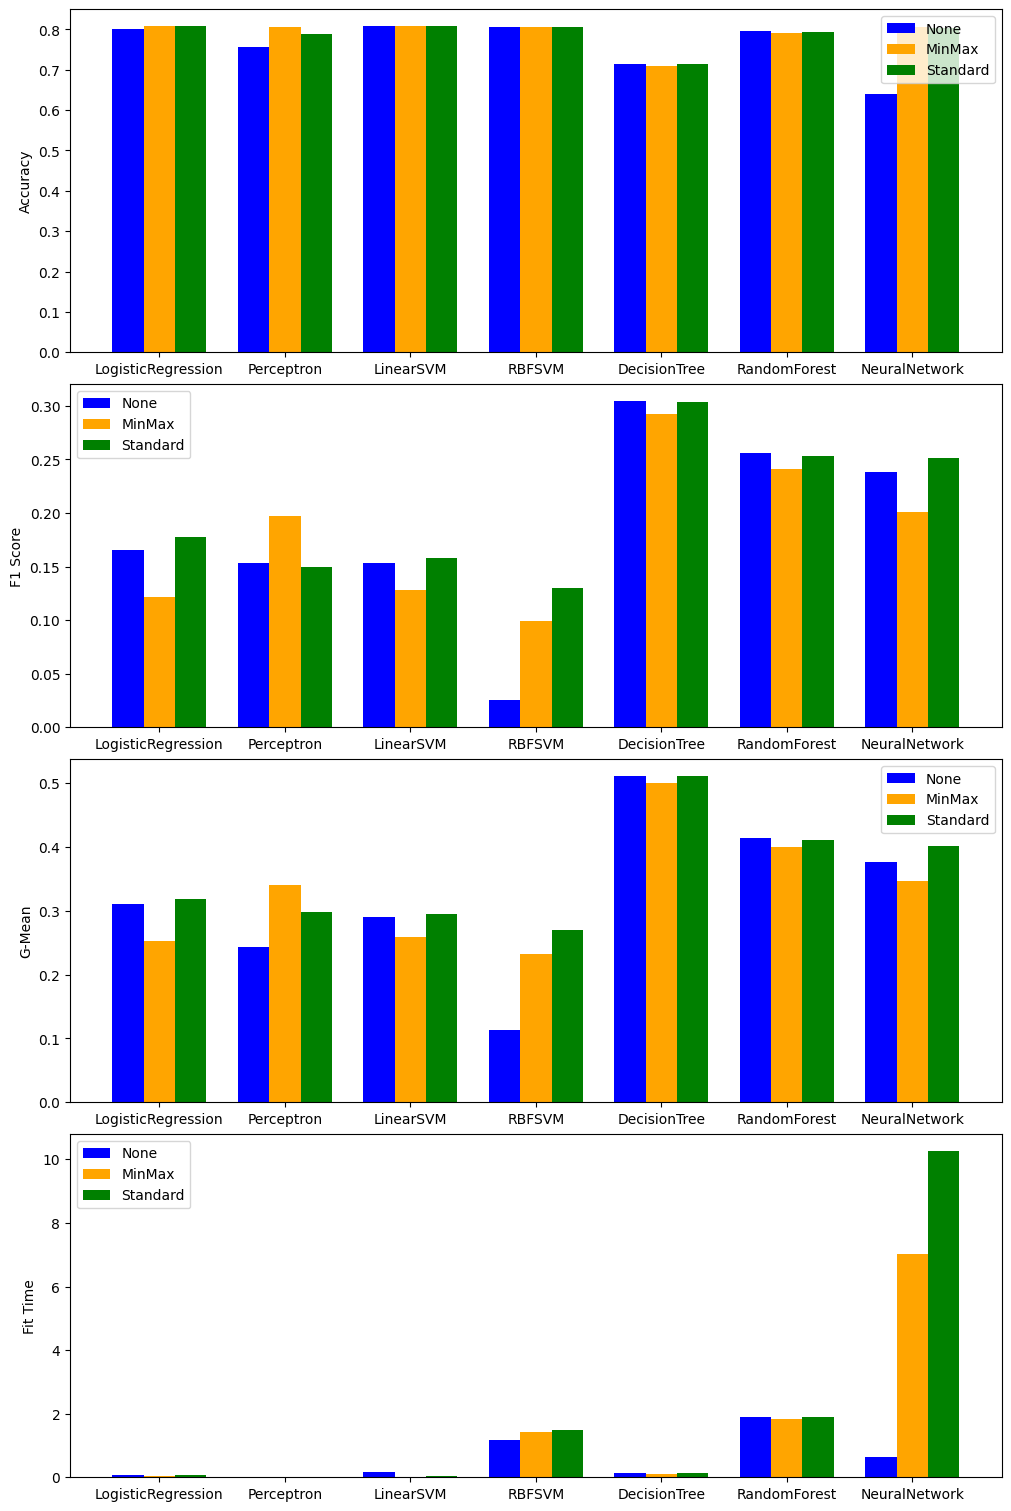

In [14]:
colors = ['blue', 'orange', 'green']
ar_width = 0.2


# Initialize the subplot with the specified figure size
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 15), constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, norm in enumerate(normalizations):
        # Get the data for the current metric and normalization
        data = df_results[df_results['Normalization'] == norm][metric]
        # Calculate the position for each bar
        positions = np.arange(len(classifiers)) + j * 0.25
        # Plot the bars
        bars = axs[i].bar(positions, data, color=colors[j], width=0.25,capsize=5, label=norm)

    # Set the x-axis labels
    axs[i].set_xticks(np.arange(len(classifiers)) + 0.25)
    axs[i].set_xticklabels(classifiers, rotation=0)
    axs[i].set_ylabel(metric)

    axs[i].legend()

plt.show()



In [15]:
# 2nd Dataset
df = pd.read_csv("mc1.csv", na_values='?')
df.dropna(inplace=True)

In [16]:
X = df.drop('c', axis=1)  # Features
y = df['c']  # Target

In [17]:
# Split the data into an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000,random_state=42),
    'Perceptron': Perceptron(max_iter=100),
    'LinearSVM': LinearSVC(C=1, max_iter=1000, dual=False,random_state=42),
    'RBFSVM': SVC(kernel='rbf', gamma='scale', C=1, max_iter=50000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [19]:
# Data structure to store results
cv_results = {
    'Classifier': [],
    'Normalization': [],
    'Accuracy': [],
    'F1 Score': [],
    'G-Mean': [],
    'Fit Time': [],
    'Accuracy Std': [],  # Adding standard deviation keys
    'F1 Score Std': [],
    'G-Mean Std': [],
    'Fit Time Std': []
}

In [20]:
# Perform cross-validation for each classifier and normalization technique
for scale, scaler in scalers.items():
    for name, clf in classifiers.items():
        # Cross-validation
        if scale != 'None' or name not in ['LogisticRegression','RBFSVM']:
            scores = cross_validate(pipes(scaler, clf), X, y, cv=5, scoring=scorers)
        # Append results to data structure
            cv_results['Classifier'].append(name)
            cv_results['Normalization'].append(scale)
            cv_results['Accuracy'].append(scores['test_accuracy'].mean())
            cv_results['F1 Score'].append(scores['test_f1'].mean())
            cv_results['G-Mean'].append(scores['test_g_mean'].mean())
            cv_results['Fit Time'].append(np.mean(scores['fit_time']))  # fit_time is collected separately
            cv_results['Accuracy Std'].append(np.std(scores['test_accuracy']))
            cv_results['F1 Score Std'].append(np.std(scores['test_f1']))
            cv_results['G-Mean Std'].append(np.std(scores['test_g_mean']))
            cv_results['Fit Time Std'].append(np.std(scores['fit_time']))
        else:
            cv_results['Classifier'].append(name)
            cv_results['Normalization'].append(scale)
            cv_results['Accuracy'].append(0)
            cv_results['F1 Score'].append(0)
            cv_results['G-Mean'].append(0)
            cv_results['Fit Time'].append(0)  # fit_time is collected separately
            cv_results['Accuracy Std'].append(0)
            cv_results['F1 Score Std'].append(0)
            cv_results['G-Mean Std'].append(0)
            cv_results['Fit Time Std'].append(0)

In [21]:
# Convert results to DataFrame for analysis
df_results = pd.DataFrame(cv_results)
columns_to_print = ['Classifier', 'Normalization', 'Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
print(df_results[columns_to_print])

            Classifier Normalization  Accuracy  F1 Score    G-Mean  Fit Time
0   LogisticRegression          None  0.000000  0.000000  0.000000  0.000000
1           Perceptron          None  0.962608  0.000000  0.000000  0.007348
2            LinearSVM          None  0.992816  0.028571  0.055470  0.237613
3               RBFSVM          None  0.000000  0.000000  0.000000  0.000000
4         DecisionTree          None  0.993345  0.545895  0.731808  0.029206
5         RandomForest          None  0.994824  0.522060  0.626592  0.396682
6        NeuralNetwork          None  0.988485  0.009524  0.053067  0.749667
7   LogisticRegression        MinMax  0.992922  0.028571  0.055470  0.026179
8           Perceptron        MinMax  0.992605  0.028571  0.055470  0.008027
9            LinearSVM        MinMax  0.992922  0.028571  0.055470  0.016790
10              RBFSVM        MinMax  0.992816  0.000000  0.000000  0.072392
11        DecisionTree        MinMax  0.993345  0.551194  0.742626  0.030516

In [22]:
classifiers = ['LogisticRegression', 'Perceptron', 'LinearSVM', 'RBFSVM', 'DecisionTree', 'RandomForest', 'NeuralNetwork']
metrics = ['Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
normalizations = ['None', 'MinMax', 'Standard']

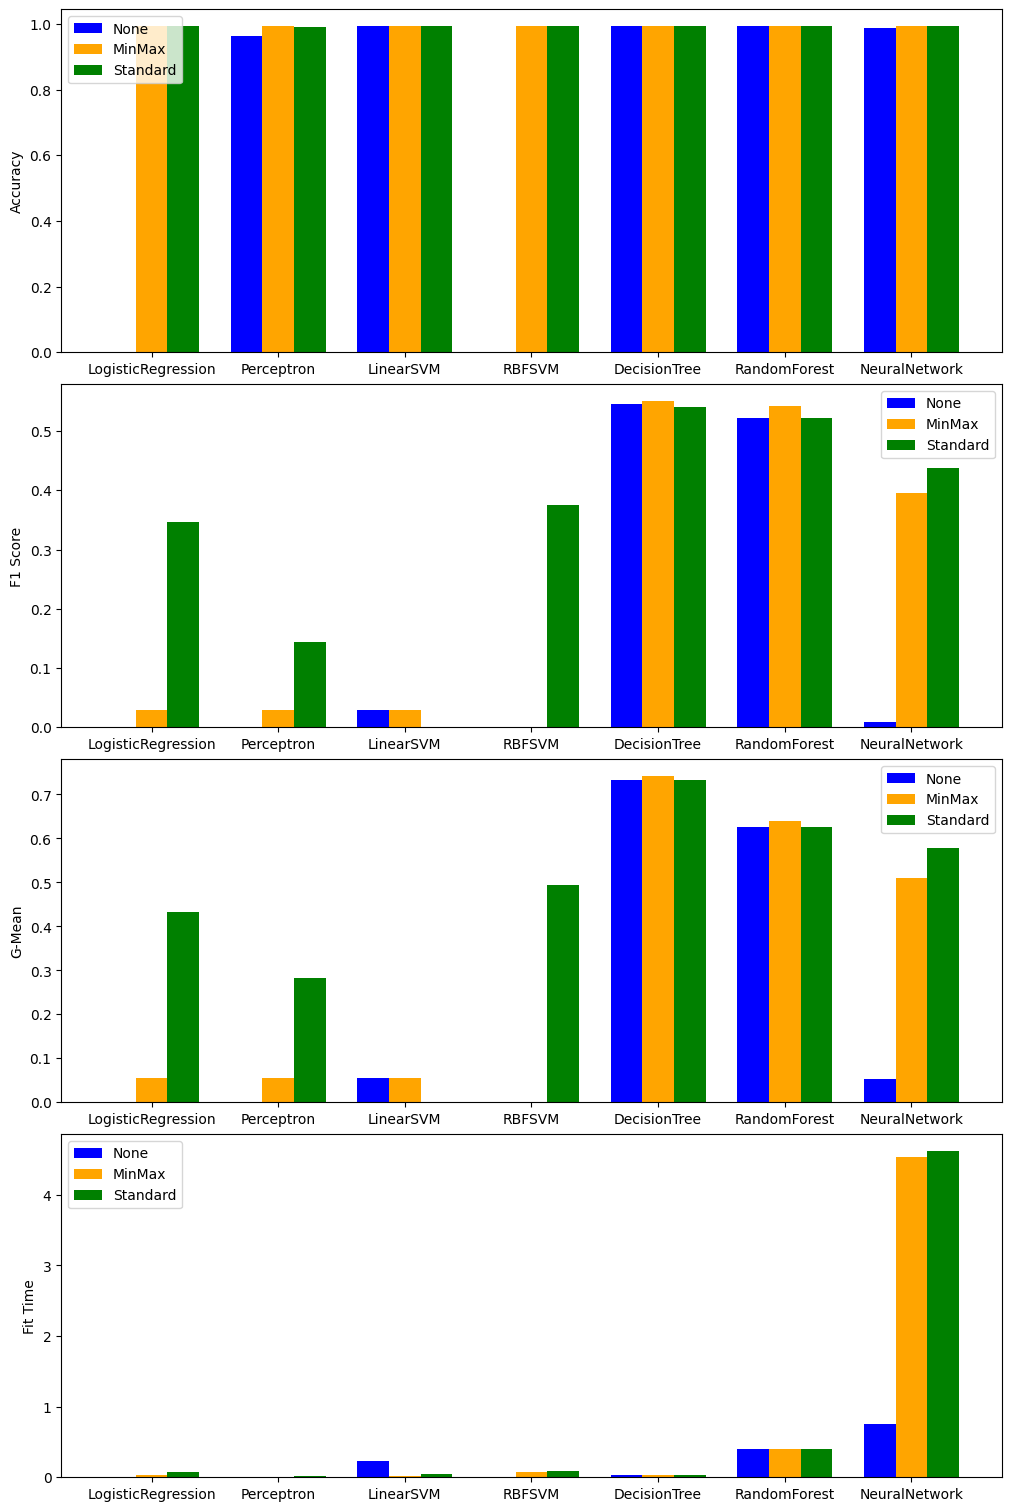

In [23]:
colors = ['blue', 'orange', 'green']
ar_width = 0.2


# Initialize the subplot with the specified figure size
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 15), constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, norm in enumerate(normalizations):
        # Get the data for the current metric and normalization
        data = df_results[df_results['Normalization'] == norm][metric]
        # Calculate the position for each bar
        positions = np.arange(len(classifiers)) + j * 0.25
        # Plot the bars
        bars = axs[i].bar(positions, data, color=colors[j], width=0.25,capsize=5, label=norm)

    # Set the x-axis labels
    axs[i].set_xticks(np.arange(len(classifiers)) + 0.25)
    axs[i].set_xticklabels(classifiers, rotation=0)
    axs[i].set_ylabel(metric)

    axs[i].legend()

plt.show()


In [24]:
# 3nd Dataset
df = pd.read_csv("pc3.csv", na_values='?')
df.dropna(inplace=True)

In [25]:
X = df.drop('c', axis=1)  # Features
y = df['c']  # Target

In [26]:
# Split the data into an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=50000,random_state=42),
    'Perceptron': Perceptron(max_iter=100),
    'LinearSVM': LinearSVC(C=1, max_iter=200, dual=False,random_state=42),
    'RBFSVM': SVC(kernel='rbf', gamma='scale', C=1, max_iter=50000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [28]:
# Data structure to store results
cv_results = {
    'Classifier': [],
    'Normalization': [],
    'Accuracy': [],
    'F1 Score': [],
    'G-Mean': [],
    'Fit Time': [],
    'Accuracy Std': [],  # Adding standard deviation keys
    'F1 Score Std': [],
    'G-Mean Std': [],
    'Fit Time Std': []
}

In [29]:
# Perform cross-validation for each classifier and normalization technique
for scale, scaler in scalers.items():
    for name, clf in classifiers.items():
        # Cross-validation
        scores = cross_validate(pipes(scaler, clf), X, y, cv=5, scoring=scorers)

        # Append results to data structure
        cv_results['Classifier'].append(name)
        cv_results['Normalization'].append(scale)
        cv_results['Accuracy'].append(scores['test_accuracy'].mean())
        cv_results['F1 Score'].append(scores['test_f1'].mean())
        cv_results['G-Mean'].append(scores['test_g_mean'].mean())
        cv_results['Fit Time'].append(np.mean(scores['fit_time']))  # fit_time is collected separately
        cv_results['Accuracy Std'].append(np.std(scores['test_accuracy']))
        cv_results['F1 Score Std'].append(np.std(scores['test_f1']))
        cv_results['G-Mean Std'].append(np.std(scores['test_g_mean']))
        cv_results['Fit Time Std'].append(np.std(scores['fit_time']))

In [30]:
# Convert results to DataFrame for analysis
df_results = pd.DataFrame(cv_results)
columns_to_print = ['Classifier', 'Normalization', 'Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
print(df_results[columns_to_print])

            Classifier Normalization  Accuracy  F1 Score    G-Mean  Fit Time
0   LogisticRegression          None  0.898276  0.285832  0.440609  1.064764
1           Perceptron          None  0.560619  0.082364  0.290107  0.003744
2            LinearSVM          None  0.900182  0.231318  0.378821  0.018145
3               RBFSVM          None  0.897633  0.000000  0.000000  0.012637
4         DecisionTree          None  0.857352  0.339417  0.568637  0.020436
5         RandomForest          None  0.904030  0.262843  0.406379  0.285622
6        NeuralNetwork          None  0.888689  0.095375  0.187977  0.143097
7   LogisticRegression        MinMax  0.897630  0.078302  0.181430  0.017722
8           Perceptron        MinMax  0.870771  0.165524  0.300624  0.003100
9            LinearSVM        MinMax  0.896991  0.066557  0.146175  0.006025
10              RBFSVM        MinMax  0.897633  0.000000  0.000000  0.020744
11        DecisionTree        MinMax  0.856072  0.337656  0.568259  0.022386

In [31]:
classifiers = ['LogisticRegression', 'Perceptron', 'LinearSVM', 'RBFSVM', 'DecisionTree', 'RandomForest', 'NeuralNetwork']
metrics = ['Accuracy', 'F1 Score', 'G-Mean', 'Fit Time']
normalizations = ['None', 'MinMax', 'Standard']

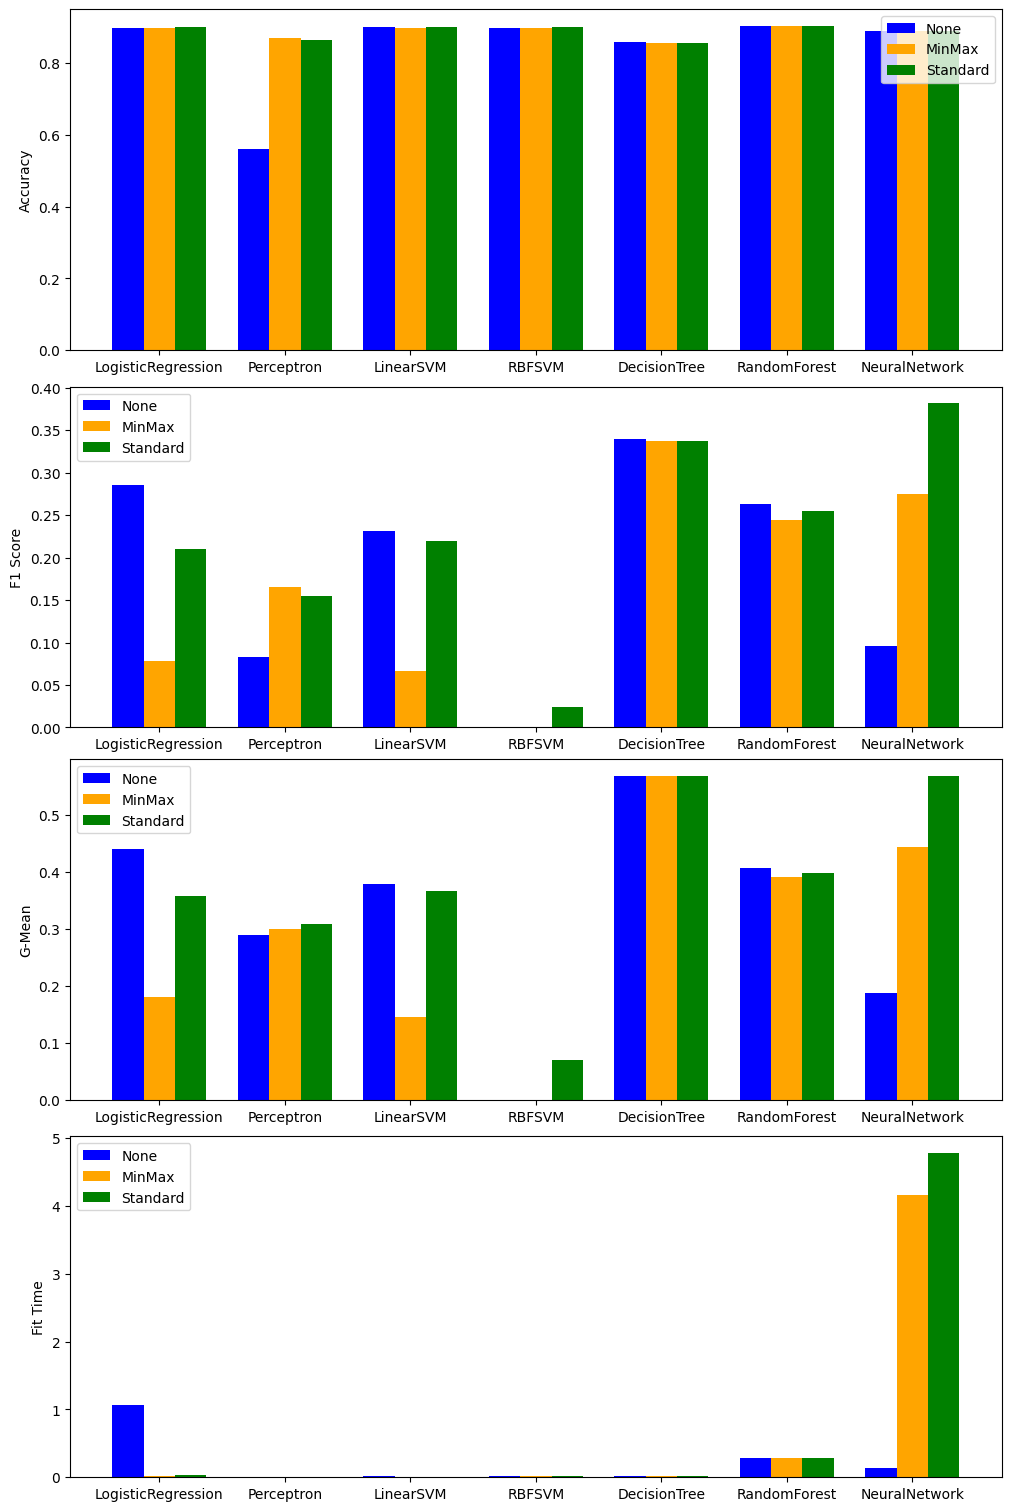

In [32]:
colors = ['blue', 'orange', 'green']
ar_width = 0.2


# Initialize the subplot with the specified figure size
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 15), constrained_layout=True)

for i, metric in enumerate(metrics):
    for j, norm in enumerate(normalizations):
        # Get the data for the current metric and normalization
        data = df_results[df_results['Normalization'] == norm][metric]
        # Calculate the position for each bar
        positions = np.arange(len(classifiers)) + j * 0.25
        # Plot the bars
        bars = axs[i].bar(positions, data, color=colors[j], width=0.25,capsize=5, label=norm)

    # Set the x-axis labels
    axs[i].set_xticks(np.arange(len(classifiers)) + 0.25)
    axs[i].set_xticklabels(classifiers, rotation=0)
    axs[i].set_ylabel(metric)

    axs[i].legend()

plt.show()

- Some alterations have been made to the model parameters (max iterations) between the datasets to allow all models to converge.
- For mc1, the non scaled Logistic Regression and RBFSVM models had to be omitted, since they were not converging in acceptable times.

Performance Discusion:

-	If accuracy is our main concern (that is, if we value true positives more), the logistic regression and linear SVM models can give us good results. The non-scaled Linear-SVM model is the best here, considering its low fit time and higher F1 and G-mean scores compared to the rest.
-	If we are worried about false negatives in our model, then we can opt for higher F1 and G-mean scores with the Decision Tree model, regardless of scaling.
-	If we want the best of both worlds and we aren’t concerned about fit time, then we can go with the Random Forest model.


